<a href="https://colab.research.google.com/github/jrad9921/Data-Analysis/blob/main/Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [ ]:
df = pd.read_csv('car.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

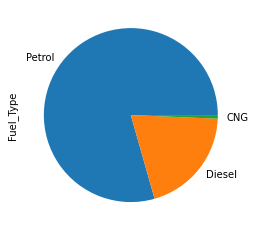

In [ ]:
df.Fuel_Type.value_counts().plot(kind='pie')

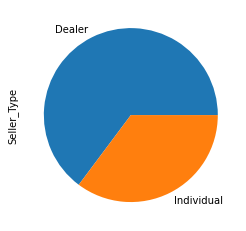

In [ ]:
df.Seller_Type.value_counts().plot(kind='pie')

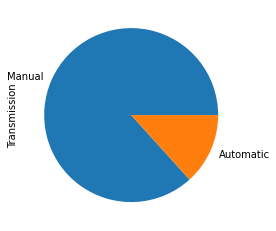

In [ ]:
df.Transmission.value_counts().plot(kind='pie')

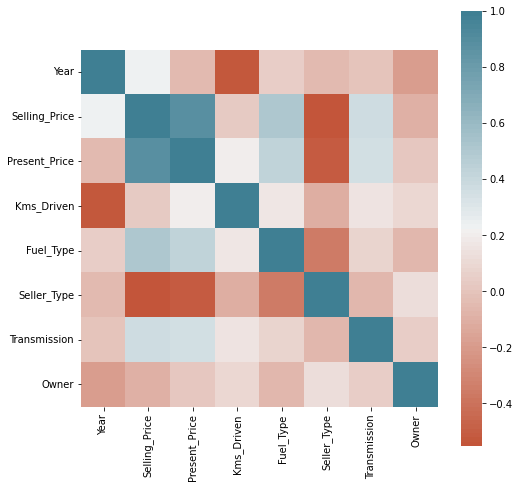

In [ ]:
correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', cmap = sns.diverging_palette(20,220,n=100))

Encoding the Categorical Data

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True) 
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace = True) 
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the Data into Input as x and Output as y


In [ ]:
x = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']
print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting the data into training and test data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.1, random_state = 2)

Model Training: linear Regression

In [ ]:
#Load the model
linear_model = LinearRegression()

In [ ]:
#Fit the data into the model
linear_model.fit(xtrain, ytrain)

LinearRegression()

Model Evaluation

In [ ]:
linear_training_prediction = linear_model.predict(xtrain)


In [ ]:
error_score = metrics.r2_score(linear_training_prediction, ytrain)
print('R Squared Error for Training Data using Linear Regression Model is: ', error_score)

R Squared Error for Training Data using Linear Regression Model is:  0.8635655509198777


Visualize the comparison between predicted and actual prices

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices Training Data using Linear Regression')

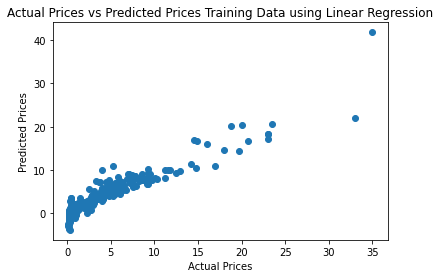

In [ ]:
plt.scatter(ytrain, linear_training_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices Training Data using Linear Regression")

In [ ]:
test_prediction = linear_model.predict(xtest)


In [ ]:
error_score = metrics.r2_score(test_prediction, ytest)
print('R Squared Error for Test Data using Linear Regression Model is: ', error_score)

R Squared Error for Test Data using Linear Regression Model is:  0.8062199941176358


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices Test Data using Linear Regression')

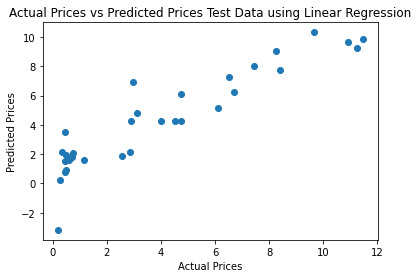

In [ ]:
plt.scatter(ytest, test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices Test Data using Linear Regression")

2. LASSO REGRESSION

In [ ]:
#Load the model
lasso_model = Lasso()

In [ ]:
#Fit the data into the model
lasso_model.fit(xtrain, ytrain)

Lasso()

Model Evaluation

In [ ]:
lasso_training_prediction = lasso_model.predict(xtrain)


In [ ]:
error_score = metrics.r2_score(lasso_training_prediction, ytrain)
print('R Squared Error for Training Data using Lasso Regression Model is: ', error_score)

R Squared Error for Training Data using Lasso Regression Model is:  0.798459024070425


Visualize the comparison between predicted and actual prices

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices Training Data using Lasso Regression')

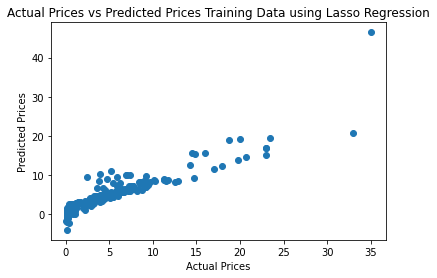

In [ ]:
plt.scatter(ytrain, lasso_training_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices Training Data using Lasso Regression")

In [ ]:
lasso_test_prediction = lasso_model.predict(xtest)


In [ ]:
error_score = metrics.r2_score(lasso_test_prediction, ytest)
print('R Squared Error for Test Data using Lasso Regression Model is: ', error_score)

R Squared Error for Test Data using Lasso Regression Model is:  0.7711110403265475


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices Test Data using Lasso Regression')

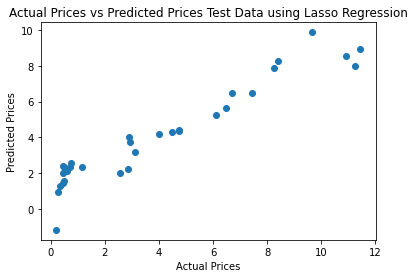

In [ ]:
plt.scatter(ytest, lasso_test_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices Test Data using Lasso Regression")